In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import re

In [14]:
df = pd.read_csv('files/speech_data_bengali.csv')
df = df.replace(float('nan'), None)
df.head()

,Subject,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57,Word 58,Word 59,Word 60
0,Original,গোপাল,কলম,বাক্য,তারকা,আমরা,তালিম,মাথায়,মকর,তুলসী,...,তেনারা,সৈকত,ব্যাসন,ঘণ্টাটি,একলা,বিবরণ,তিনি,তমাল,জলপান,অনুমিত
1,5.1,গোপাল,কলম,বাক্য,তারকা,আমরা,তালিম,মাথায়,মকর,তুলছি,...,তনারা,সৈতক,বোম্মাণ,ঘন্টাটি,একলা,বিবরণ,তিনি,তমলা,জলপান,অনুমতি
2,5.2,কপাল,কলম,বাক্য,তরকা,আমরা,তালিম,মাথায়,মকর,তুলসী,...,তেনারা,সৈকত,বাসন,ঘটনাটি,একলা,বিবরণ,তিনি,তোমাল,জলপান,অনুমিত
3,5.3,গোপাল,কলম,বাক্য,তরকা,আমরা,তালিম,মাতায়,মকর,তুলসী,...,তেনারা,সৈকক,বাসন,ঘটনাটি,একলা,বিবরণ,তিনি,তমাল,জলপান,অনুমতি
4,5.4,গোলাপি,কমলা,বাক্য,তারকা,আমার,তামিল,মাথায়,মকর,তুলসী,...,তনার,সেকত,বরগসন,ঘন্টাটি,একলা,বিরকন,তিনি,তমলা,জলপানি,অনুমতি


## Preprocessing

In [15]:
# Preprocessing
df = df.applymap(lambda s: s.strip().lower() if type(s) == str else s)
df.head()

# Build required data structures
subjects = [r[0] for i,r in df.iterrows() if i != 0]

words = df[df['Subject'] == "original"].values.tolist()[0][1:]

data = {s:[] for s in subjects}
for s, row in df.iterrows():
    if s != 0:
        for i, word in enumerate(row[1:]):
            data[subjects[s-1]].append({'original': words[i], 'pronounced': word})
data['5.1']

[{'original': 'গোপাল', 'pronounced': 'গোপাল'},
 {'original': 'কলম', 'pronounced': 'কলম'},
 {'original': 'বাক্য', 'pronounced': 'বাক্য'},
 {'original': 'তারকা', 'pronounced': 'তারকা'},
 {'original': 'আমরা', 'pronounced': 'আমরা'},
 {'original': 'তালিম', 'pronounced': 'তালিম'},
 {'original': 'মাথায়', 'pronounced': 'মাথায়'},
 {'original': 'মকর', 'pronounced': 'মকর'},
 {'original': 'তুলসী', 'pronounced': 'তুলছি'},
 {'original': 'বালতি', 'pronounced': 'বালতি'},
 {'original': 'করেন', 'pronounced': 'করেন'},
 {'original': 'প্রমাণ', 'pronounced': 'রহমান'},
 {'original': 'বকুল', 'pronounced': 'বকুল'},
 {'original': 'নরম', 'pronounced': 'নরম'},
 {'original': 'চরকি', 'pronounced': 'চরকি'},
 {'original': 'তাকালো', 'pronounced': 'তাকাল'},
 {'original': 'ধরন', 'pronounced': 'ধরণ'},
 {'original': 'আনাজ', 'pronounced': 'আরআজ'},
 {'original': 'মানতেই', 'pronounced': 'মানতেই'},
 {'original': 'কদম', 'pronounced': 'কদম'},
 {'original': 'নেতারা', 'pronounced': 'নেতারা'},
 {'original': 'সতর্ক', 'pronounced'

## Student Data

In [16]:
def calculate_score(subject):
    pronounced = df[df['Subject'] == subject].values.tolist()[0][1:]
    original = df[df['Subject'] == "original"].values.tolist()[0][1:]
    try:
        return sum([1 if x == y else 0 for x,y in zip(pronounced,original)])
    except:
        print(pronounced)

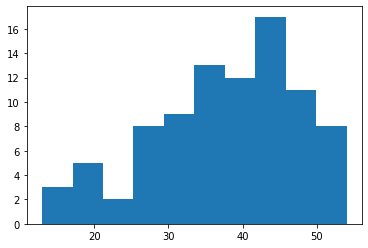

In [17]:
# Histogram
scores = [calculate_score(x) for x in subjects]
plt.hist(scores, bins=10)
plt.show()

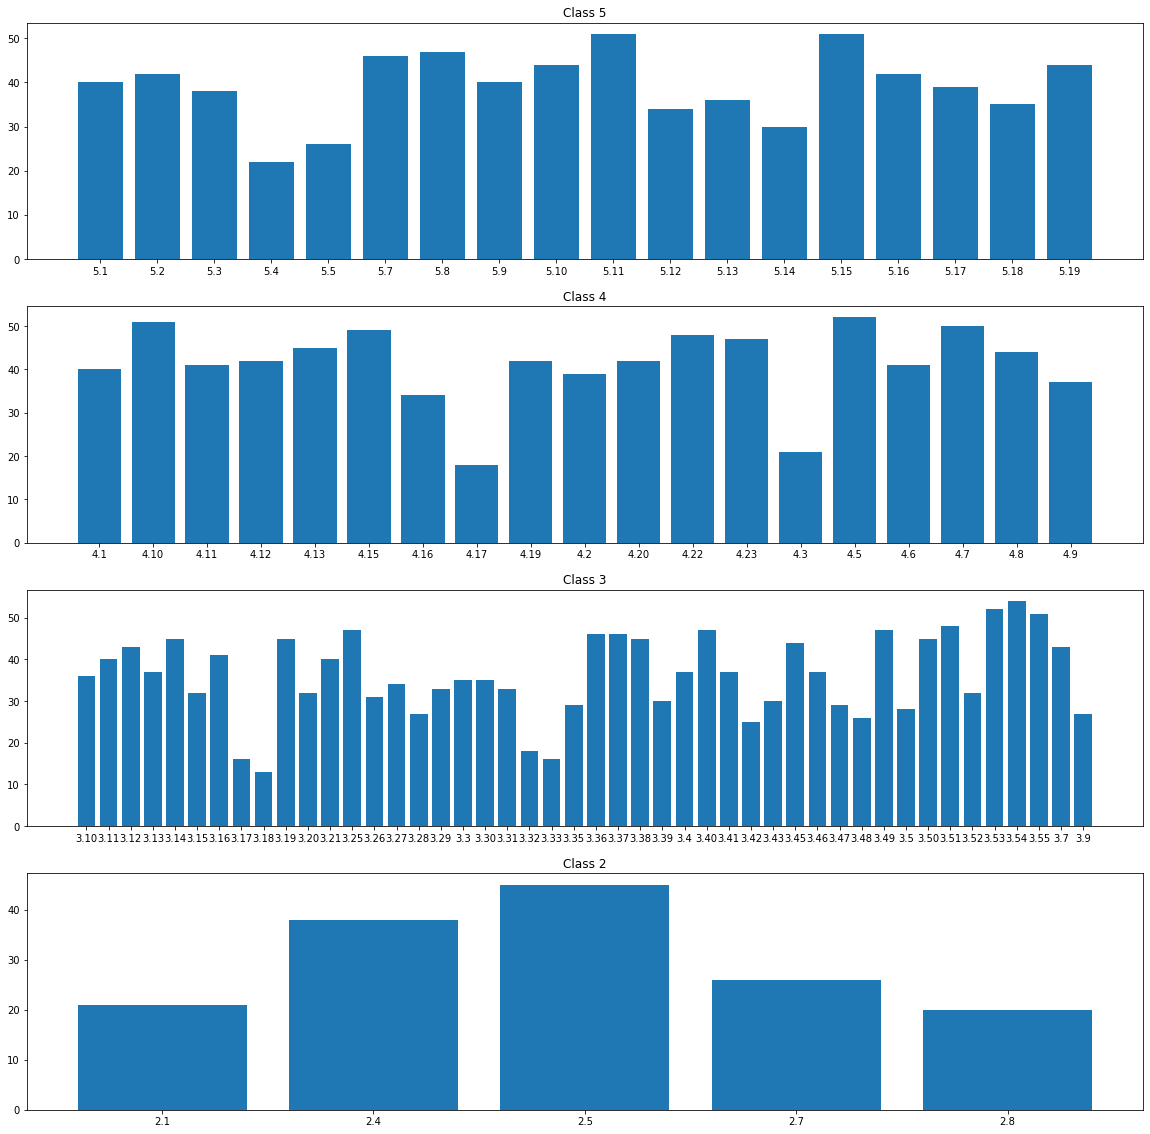

In [18]:
# Classwise bar plots
grade_5 = list(filter(lambda x: re.match(r"^5.\d*", x), subjects))
grade_4 = list(filter(lambda x: re.match(r"^4.\d*", x), subjects))
grade_3 = list(filter(lambda x: re.match(r"^3.\d*", x), subjects))
grade_2 = list(filter(lambda x: re.match(r"^2.\d*", x), subjects))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20))

ax1.bar(grade_5, scores[:len(grade_5)])
ax1.set_title('Class 5')
ax2.bar(grade_4, scores[len(grade_5):len(grade_5)+len(grade_4)])
ax2.set_title('Class 4')
ax3.bar(grade_3, scores[len(grade_5)+len(grade_4):len(grade_5)+len(grade_4)+len(grade_3)])
ax3.set_title('Class 3')
ax4.bar(grade_2, scores[len(grade_5)+len(grade_4)+len(grade_3):])
ax4.set_title('Class 2')

plt.show()

## How the words were pronounced

## Anagrams and migrations

In [19]:
def check_anagram(word1, word2):
    return sorted(word1) == sorted(word2)

In [20]:
anagrams_pronounced, middle_migrations, exterior_migrations = [], [], []
for _, row in data.items():
    anagram_count, mid_mig_count, ext_mig_count = 0, 0, 0
    for w in row:
        w['is_anagram'] = (w['original'] != w['pronounced']) and \
                          check_anagram(w['original'], w['pronounced'])
        if w['is_anagram']:
            anagram_count += 1
            if w['original'][0] != w['pronounced'][0] or w['original'][-1] != w['pronounced'][-1]:
                w['is_exterior_migration'] = True
                ext_mig_count += 1
            else:
                w['is_exterior_migration'] = False
        
            w['is_middle_migration'] = check_anagram(w['original'][1:-1], w['pronounced'][1:-1])
            if w['is_middle_migration']:
                mid_mig_count += 1
        else:
            w['is_exterior_migration'] = False
            w['is_middle_migration'] = False
    
    anagrams_pronounced.append(anagram_count)
    middle_migrations.append(mid_mig_count)
    exterior_migrations.append(ext_mig_count)

## Levenshtein Distance

In [21]:
#Reference: https://www.datacamp.com/community/tutorials/fuzzy-string-python
def levenshtein_distance(s, t):
    rows, cols = len(s)+1, len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0], distance[0][k] = i, k
  
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,
                                 distance[row][col-1] + 1,
                                 distance[row-1][col-1] + cost)
    return distance[row][col]



In [22]:
avg_levenshtein_distances = []
for _, row in data.items():
    total_distance = 0
    for w in row:
        w['distance'] = levenshtein_distance(w['original'], w['pronounced'])
        total_distance += w['distance']
    avg_levenshtein_distances.append(total_distance/len(words))

In [23]:
processed_df = pd.DataFrame(
    data={"Subject": subjects, "Average Levenshtein Distance": avg_levenshtein_distances, 
          "Anagrams pronounced": anagrams_pronounced, "Middle letter migrations": middle_migrations, 
          "Exterior Migrations": exterior_migrations}
)
processed_df
# processed_df.to_csv("files/bengali_processed.csv", index=False)